# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [4]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [5]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [41]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
208,1,96,64,27,87,33.2,0.289,21,0
2,8,183,64,0,0,23.3,0.672,32,1
322,0,124,70,20,0,27.4,0.254,36,1
337,5,115,76,0,0,31.2,0.343,44,1
600,1,108,88,19,0,27.1,0.400,24,0


In [42]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [43]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [8]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [44]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [45]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [46]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3938 - loss: 0.9067 - val_accuracy: 0.4219 - val_loss: 0.8666
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4133 - loss: 0.8725 - val_accuracy: 0.4219 - val_loss: 0.8552
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4110 - loss: 0.8595 - val_accuracy: 0.4375 - val_loss: 0.8444
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4196 - loss: 0.8533 - val_accuracy: 0.4323 - val_loss: 0.8342
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 0.8472 - val_accuracy: 0.4427 - val_loss: 0.8247
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4430 - loss: 0.8225 - val_accuracy: 0.4479 - val_loss: 0.8157
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4311 - loss: 0.8365 - val_accuracy: 0.4427 - val_loss: 0.8072
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4657 - loss: 0.8051 - val_accuracy: 0.4531 - 

In [47]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype("int32")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [48]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [49]:
y_pred_prob_nn_1[:10]

array([[0.33023334],
       [0.56606907],
       [0.32680103],
       [0.33791423],
       [0.22192477],
       [0.5650979 ],
       [0.08074589],
       [0.3318789 ],
       [0.8081059 ],
       [0.31697533]], dtype=float32)

Create the plot_roc function

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.791


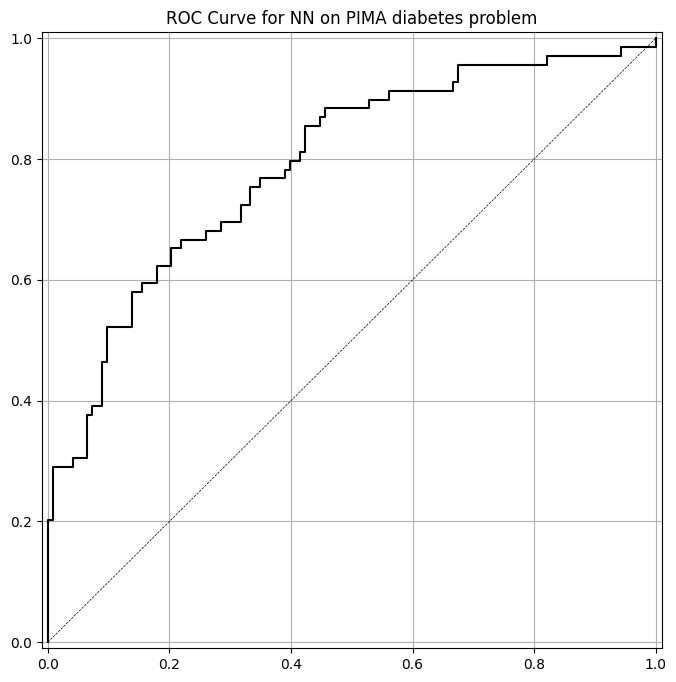

In [50]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [51]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

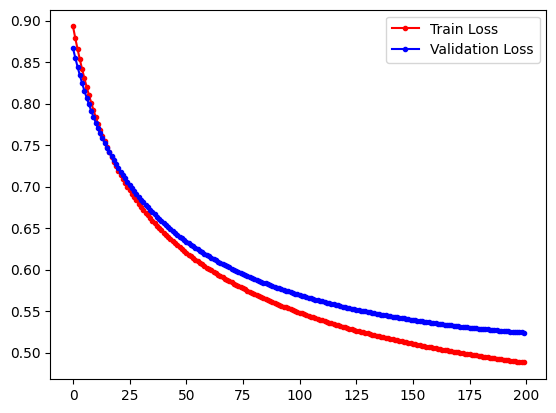

In [52]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

The train loss and validation loss has a huge decrease from the beginning of the training then starts to flatten after 50 epoch. After it the train loss still goes down compared to validation loss which means it the model training has minimal losses.

### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#### Trial 1

The training loss keeps going down, but the validation loss stops improving after many epochs. Training accuracy becomes higher than validation accuracy, so this model shows overfitting because it trains too long.

In [9]:
# Build a model with two hidden layers, each with 6 nodes
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

model_supp_1 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Use a learning rate of .003 and train for 1500 epochs

model_supp_1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_supp_1 = model_supp_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3919 - loss: 0.7400 - val_accuracy: 0.4219 - val_loss: 0.7338
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4402 - loss: 0.7320 - val_accuracy: 0.4583 - val_loss: 0.7311
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4693 - loss: 0.7262 - val_accuracy: 0.4635 - val_loss: 0.7286
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4848 - loss: 0.7280 - val_accuracy: 0.4740 - val_loss: 0.7263
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5094 - loss: 0.7142 - val_accuracy: 0.4844 - val_loss: 0.7240
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4915 - loss: 0.7161 - val_accuracy: 0.5000 - val_loss: 0.7219
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5487 - loss: 0.7052 - val_accuracy: 0.5000 - val_loss: 0.7199
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5032 - loss: 0.7177 - val_accurac

In [12]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_supp_pred_prob_nn_1 = model_supp_1.predict(X_test_norm)
y_supp_pred_class_nn_1 = (y_supp_pred_prob_nn_1 > 0.5).astype("int32")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [13]:
# Graph the trajectory of the loss functions, accuracy on both train and test set

run_supp_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Trial 1 - Loss')

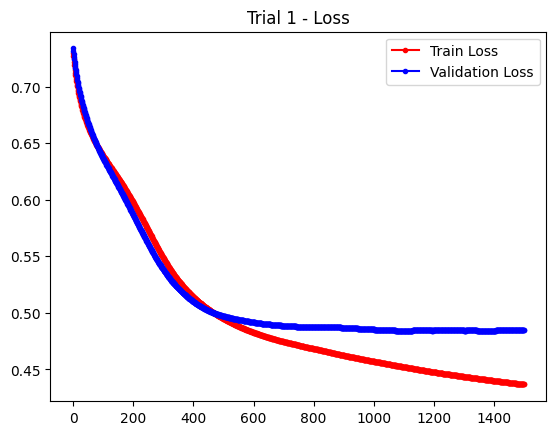

In [36]:
# loss
fig, ax = plt.subplots()
ax.plot(run_supp_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_supp_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.title("Trial 1 - Loss")

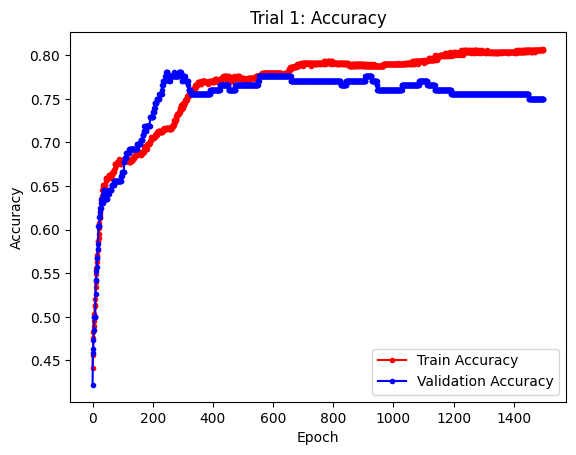

In [35]:
# accuracy
fig, ax = plt.subplots()
ax.plot(run_supp_1.history["accuracy"], 'r', marker='.', label="Train Accuracy")
ax.plot(run_supp_1.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.title("Trial 1 - Accuracy")
plt.show()


accuracy is 0.750
roc-auc is 0.817


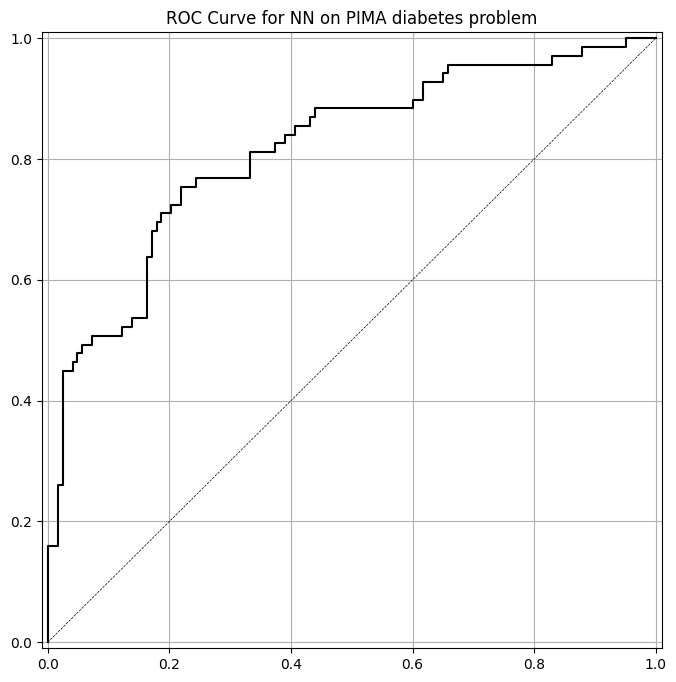

In [19]:
# Plot the roc curve for the prediction

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_supp_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_supp_pred_prob_nn_1)))

plot_roc(y_test, y_supp_pred_prob_nn_1, 'NN')

#### Trial 2

This model learns very fast because of the higher learning rate, but the validation loss starts to increase early. The gap between train and validation accuracy is larger, which means strong overfitting and unstable learning.

In [20]:

model_supp_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Use a learning rate of .003 and train for 1500 epochs

model_supp_2.compile(SGD(learning_rate = .007), "binary_crossentropy", metrics=["accuracy"])
run_supp_2 = model_supp_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3344 - loss: 0.8710 - val_accuracy: 0.3698 - val_loss: 0.8367
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3496 - loss: 0.8606 - val_accuracy: 0.4531 - val_loss: 0.7968
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4594 - loss: 0.7812 - val_accuracy: 0.5000 - val_loss: 0.7659
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5015 - loss: 0.7451 - val_accuracy: 0.5312 - val_loss: 0.7412
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5179 - loss: 0.7340 - val_accuracy: 0.5469 - val_loss: 0.7211
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5202 - loss: 0.7194 - val_accuracy: 0.5625 - val_loss: 0.7043
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5648 - loss: 0.6931 - val_accuracy: 0.6094 - val_loss: 0.6901
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6097 - loss: 0.6788 - val_accuracy: 0

In [22]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_supp_pred_prob_nn_2 = model_supp_2.predict(X_test_norm)
y_supp_pred_class_nn_2 = (y_supp_pred_prob_nn_2 > 0.5).astype("int32")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [23]:
# Graph the trajectory of the loss functions, accuracy on both train and test set

run_supp_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Trial 2 - Loss')

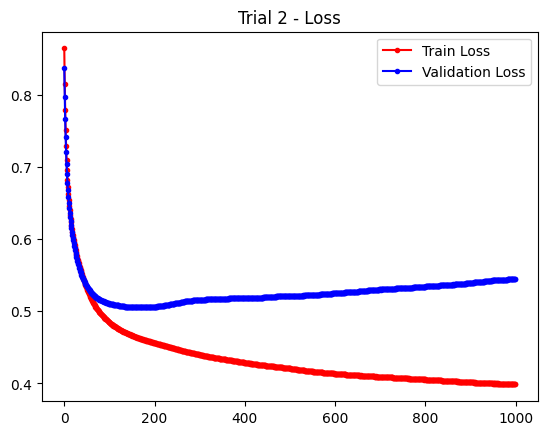

In [37]:
# loss
fig, ax = plt.subplots()
ax.plot(run_supp_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_supp_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.title("Trial 2 - Loss")

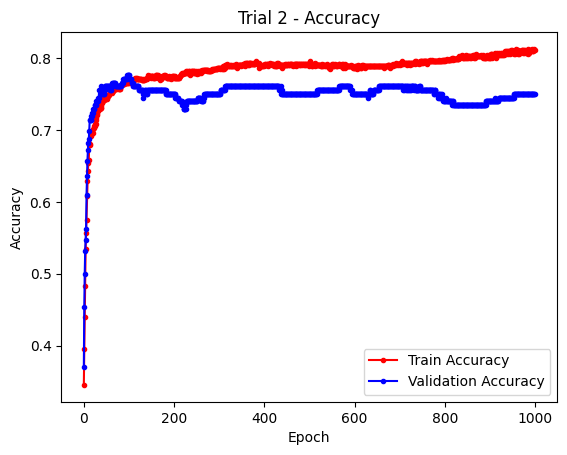

In [38]:
# accuracy
fig, ax = plt.subplots()
ax.plot(run_supp_2.history["accuracy"], 'r', marker='.', label="Train Accuracy")
ax.plot(run_supp_2.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.title("Trial 2 - Accuracy")
plt.show()


accuracy is 0.750
roc-auc is 0.798


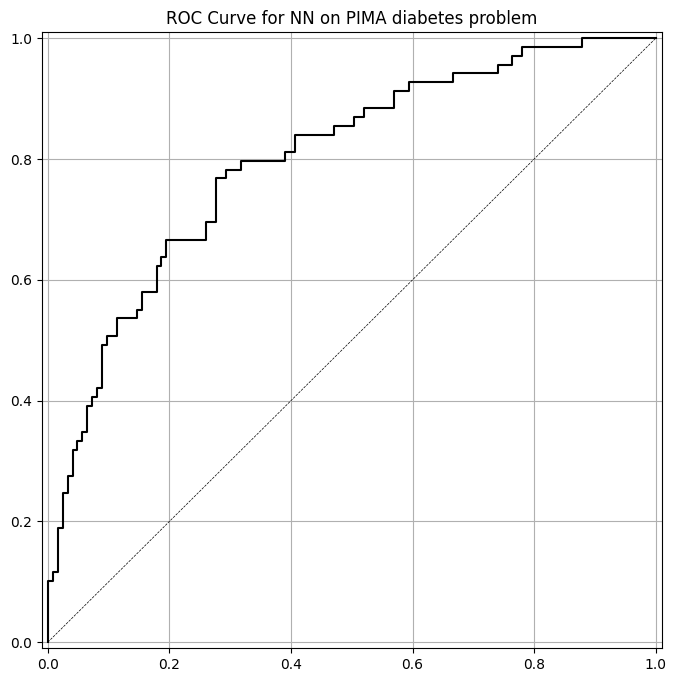

In [26]:
# Plot the roc curve for the prediction

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_supp_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_supp_pred_prob_nn_2)))

plot_roc(y_test, y_supp_pred_prob_nn_2, 'NN')

#### Trial 3

Training and validation loss decrease smoothly and stay close to each other. Accuracy is stable for both sets, so this model has better generalization and the most balanced performance.

In [27]:
model_supp_3 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Use a learning rate of .003 and train for 1000 epochs

model_supp_3.compile(SGD(learning_rate = .002), "binary_crossentropy", metrics=["accuracy"])
run_supp_3 = model_supp_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3439 - loss: 0.8835 - val_accuracy: 0.3594 - val_loss: 0.8451
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3647 - loss: 0.8437 - val_accuracy: 0.3542 - val_loss: 0.8271
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3189 - loss: 0.8528 - val_accuracy: 0.3594 - val_loss: 0.8106
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3431 - loss: 0.8450 - val_accuracy: 0.3698 - val_loss: 0.7955
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3535 - loss: 0.8094 - val_accuracy: 0.3750 - val_loss: 0.7817
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4026 - loss: 0.7799 - val_accuracy: 0.3958 - val_loss: 0.7691
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3824 - loss: 0.7839 - val_accuracy: 0.4271 - val_loss: 0.7575
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4153 - loss: 0.7645 - val_accuracy: 0.4323 - 

In [29]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_supp_pred_prob_nn_3 = model_supp_3.predict(X_test_norm)
y_supp_pred_class_nn_3 = (y_supp_pred_prob_nn_3 > 0.5).astype("int32")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [30]:
# Graph the trajectory of the loss functions, accuracy on both train and test set

run_supp_3.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'Trial 3 - Loss')

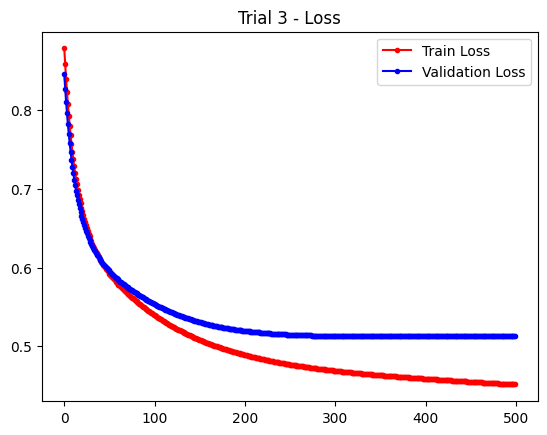

In [39]:
# loss
fig, ax = plt.subplots()
ax.plot(run_supp_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_supp_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.title("Trial 3 - Loss")

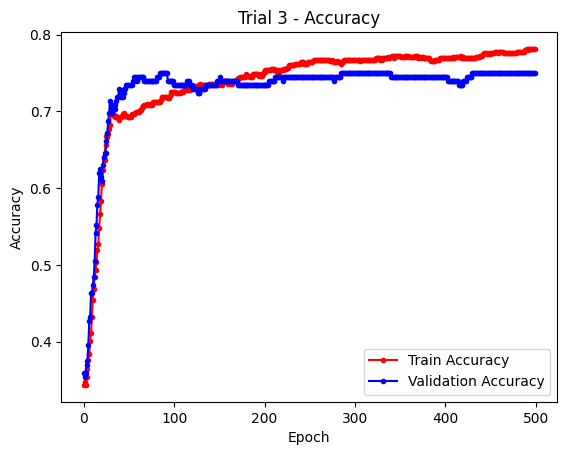

In [40]:
# accuracy
fig, ax = plt.subplots()
ax.plot(run_supp_3.history["accuracy"], 'r', marker='.', label="Train Accuracy")
ax.plot(run_supp_3.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.title("Trial 3 - Accuracy")
plt.show()


accuracy is 0.750
roc-auc is 0.806


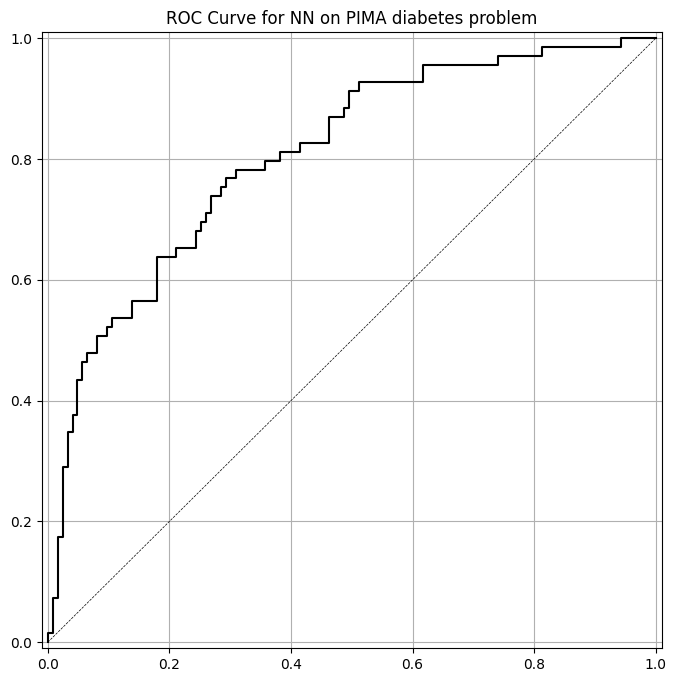

In [53]:
# Plot the roc curve for the prediction

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_supp_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_supp_pred_prob_nn_3)))

plot_roc(y_test, y_supp_pred_prob_nn_3, 'NN')

#### Conclusion

In conclusion, the third model is the best because the training and validation loss are close and the accuracy is stable on both sets. The first model overfits since it trains for too many epochs, and the second model overfits faster because the learning rate is high. So, using a moderate learning rate and a balanced network helps the model to provide better output..